In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
728,2684-EIWEO,Female,1,No,No,30,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card (automatic),91.70,2758.15,Yes
3709,2103-ZRXFN,Male,0,No,No,1,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,50.75,50.75,No
3970,2541-YGPKE,Male,0,Yes,Yes,42,Yes,No,DSL,Yes,...,No,Yes,No,Yes,One year,No,Credit card (automatic),63.70,2763.35,No
3664,6257-RJOHI,Male,0,No,No,4,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.80,202.3,No
4902,5092-STPKP,Female,0,No,No,24,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),56.35,1381.2,No


In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values # It's a string type for some reason

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull() # Coerce forces a change to happen. Could make it N/A
# Use isnull to find where NA appears

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape
# pd.to_numeric statement can work as an index since it returns True
# Can even get the shape, since it's an array

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.iloc[488]['TotalCharges']

' '

In [12]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [16]:
df1.TotalCharges.dtypes

dtype('float64')

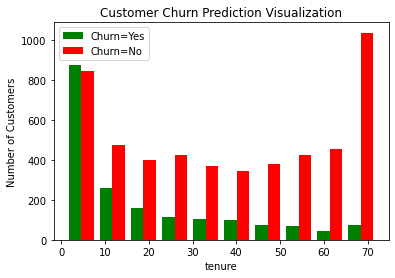

In [22]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'],label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [29]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [30]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [32]:
df1.replace('No internet service', 'No', inplace=True) #inplace means the chosen df is affected by the function
df1.replace('No phone service', 'No', inplace=True)

In [33]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [35]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [39]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [41]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [42]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [44]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns
# Since InternetService can't be made binary, it gets split into columns for every variable which can be binary

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

## Scaling

In [45]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [46]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5431,1,0,0,0,0.507042,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3506,0,0,0,0,0.253521,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
5608,1,0,1,1,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0


In [48]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [49]:
df2.shape

(7032, 27)

In [52]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## Building NN

In [55]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'), # input shape matching amount of columns
    #keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 541us/step - loss: 0.6756 - accuracy: 0.5560
Epoch 2/100
176/176 [==============================] - 0s 524us/step - loss: 0.4546 - accuracy: 0.7864
Epoch 3/100
176/176 [==============================] - 0s 519us/step - loss: 0.4279 - accuracy: 0.8016
Epoch 4/100
176/176 [==============================] - 0s 553us/step - loss: 0.4162 - accuracy: 0.7997
Epoch 5/100
176/176 [==============================] - 0s 547us/step - loss: 0.4082 - accuracy: 0.8082
Epoch 6/100
176/176 [==============================] - 0s 517us/step - loss: 0.4042 - accuracy: 0.8108
Epoch 7/100
176/176 [==============================] - 0s 541us/step - loss: 0.4198 - accuracy: 0.7970
Epoch 8/100
176/176 [==============================] - 0s 564us/step - loss: 0.4106 - accuracy: 0.8030
Epoch 9/100
176/176 [==============================] - 0s 547us/step - loss: 0.4150 - accuracy: 0.8047
Epoch 10/100
176/176 [==============================] - 0s 621us/step - l

176/176 [==============================] - 0s 544us/step - loss: 0.3901 - accuracy: 0.8237
Epoch 80/100
176/176 [==============================] - 0s 553us/step - loss: 0.3769 - accuracy: 0.8192
Epoch 81/100
176/176 [==============================] - 0s 593us/step - loss: 0.3832 - accuracy: 0.8243
Epoch 82/100
176/176 [==============================] - 0s 524us/step - loss: 0.3791 - accuracy: 0.8212
Epoch 83/100
176/176 [==============================] - 0s 519us/step - loss: 0.3870 - accuracy: 0.8142
Epoch 84/100
176/176 [==============================] - 0s 551us/step - loss: 0.3868 - accuracy: 0.8184
Epoch 85/100
176/176 [==============================] - 0s 564us/step - loss: 0.3889 - accuracy: 0.8149
Epoch 86/100
176/176 [==============================] - 0s 564us/step - loss: 0.3850 - accuracy: 0.8176
Epoch 87/100
176/176 [==============================] - 0s 564us/step - loss: 0.3795 - accuracy: 0.8191
Epoch 88/100
176/176 [==============================] - 0s 553us/step - loss:

In [56]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 510us/step - loss: 0.4498 - accuracy: 0.7832


[0.4497792720794678, 0.783226728439331]

In [57]:
yp = model.predict(X_test)
yp[:5]

array([[0.20513576],
       [0.41340023],
       [0.00906989],
       [0.7734271 ],
       [0.4170158 ]], dtype=float32)

In [60]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [59]:
y_pred = []
for element in yp:
    if element > .5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [61]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407



Text(69.0, 0.5, 'Truth')

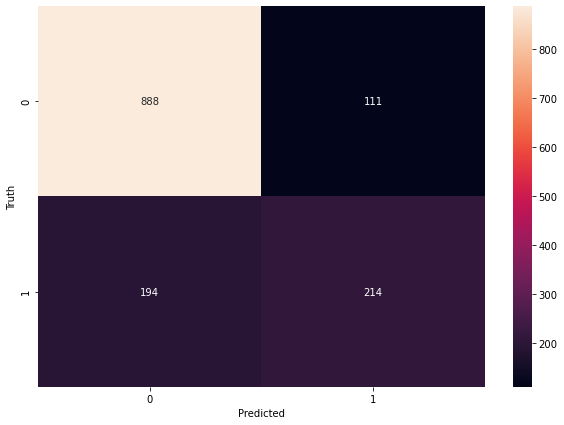

In [64]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
(888+214) / (888+214+111+194)

0.783226723525231

In [69]:
# Precision for 0 class i.e Precision for customers who did not churn
round(888/(888+214),2)

0.81

In [70]:
# Precision for 1 class i.e Precision for customers who did churn
round(214/(214+111),2)

0.66

In [72]:
# Recall: accuracy for x compared to total x
#Recall: 0 Class
round(888/(888+111),2)

0.89

In [73]:
#Recall: 1 Class
round(214/(214+194),2)

0.52